In [1]:
# data
import pandas as pd
import numpy as np


# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
#import shap

# I- Analyse statistique multi-variée

## I.1- Lecture des données

In [2]:
df = pd.read_csv('HCV-Egy-Data.csv')

In [3]:
# show top 5
df.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


nous remarquons que notre jeu de données est constitué de __29 caractérisatiques__ totalement __numeriques__

In [4]:
# show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1385 non-null   int64  
 1   Gender                            1385 non-null   int64  
 2   BMI                               1385 non-null   int64  
 3   Fever                             1385 non-null   int64  
 4   Nausea/Vomting                    1385 non-null   int64  
 5   Headache                          1385 non-null   int64  
 6   Diarrhea                          1385 non-null   int64  
 7   Fatigue & generalized bone ache   1385 non-null   int64  
 8   Jaundice                          1385 non-null   int64  
 9   Epigastric pain                   1385 non-null   int64  
 10  WBC                               1385 non-null   int64  
 11  RBC                               1385 non-null   float64
 12  HGB   

In [5]:
# show shape of df
df.shape

(1385, 29)

In [6]:
# show description
df.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000


Ce jeu possède __1385 observations__

> 1. Quelles variables proposez-vous de conserver pour l’étude des corrélations ? Eliminez les colonnes qui ne seront pas utilisées avec la méthode drop() de la classe DataFrame.

Nous remarquons que dans l'ensemble de caractéristique, __nous remarquons que nous aurons de nombreuses valeur dimensionnelle au format binaire__. Alors, nous allons retirer ses caractéristiques: 

> 2. Stockez les noms des colonnes restantes de façon à conserver les noms des variables avec l’attribut columns de la classe DataFrame.

In [7]:
[print(df[el].describe()) for el in df.describe()]

count    1385.000000
mean       46.319134
std         8.781506
min        32.000000
25%        39.000000
50%        46.000000
75%        54.000000
max        61.000000
Name: Age , dtype: float64
count    1385.000000
mean        1.489531
std         0.500071
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Gender, dtype: float64
count    1385.000000
mean       28.608664
std         4.076215
min        22.000000
25%        25.000000
50%        29.000000
75%        32.000000
max        35.000000
Name: BMI, dtype: float64
count    1385.000000
mean        1.515523
std         0.499939
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: Fever, dtype: float64
count    1385.000000
mean        1.502527
std         0.500174
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: Nausea/Vomting, dtype: float64
count    1385

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [8]:
dfAfterSelection = df.drop([df.columns[1],*df.columns[3:11]], axis=1)
dfAfterSelection

,Age,BMI,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,35,4248807.0,14,112132.0,99,84,52.0,109,81,5,5,5,655330,634536,288194,5,5,13,2
1,46,29,4429425.0,10,129367.0,91,123,95.0,75,113,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,33,4621191.0,12,151522.0,113,49,95.0,107,116,5,5,5,571148,661346,5,735945,558829,4,4
3,49,33,4794631.0,10,146457.0,43,64,109.0,80,88,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,32,4606375.0,11,187684.0,99,104,67.0,48,120,94,90,30,660410,738756,3731527,338946,242861,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,29,4957174.0,15,202520.0,122,59,78.0,106,127,63,44,45,387795,55938,5,5,5,15,4
1381,55,34,4636951.0,10,115776.0,128,102,65.0,99,108,97,64,41,481378,152961,393339,73574,236273,10,2
1382,42,26,4122038.0,14,128354.0,61,93,123.0,61,116,87,39,24,612664,572756,806109,343719,160457,6,2
1383,52,29,4241990.0,10,205908.0,70,97,104.0,74,47,48,81,43,139872,76161,515730,2460,696074,15,3


## I.2- Examen des données

> - Calculez le coefficient de corrélation entre chaque couple de variables numériques en utilisant la méthode corr() de la classe DataFrame.

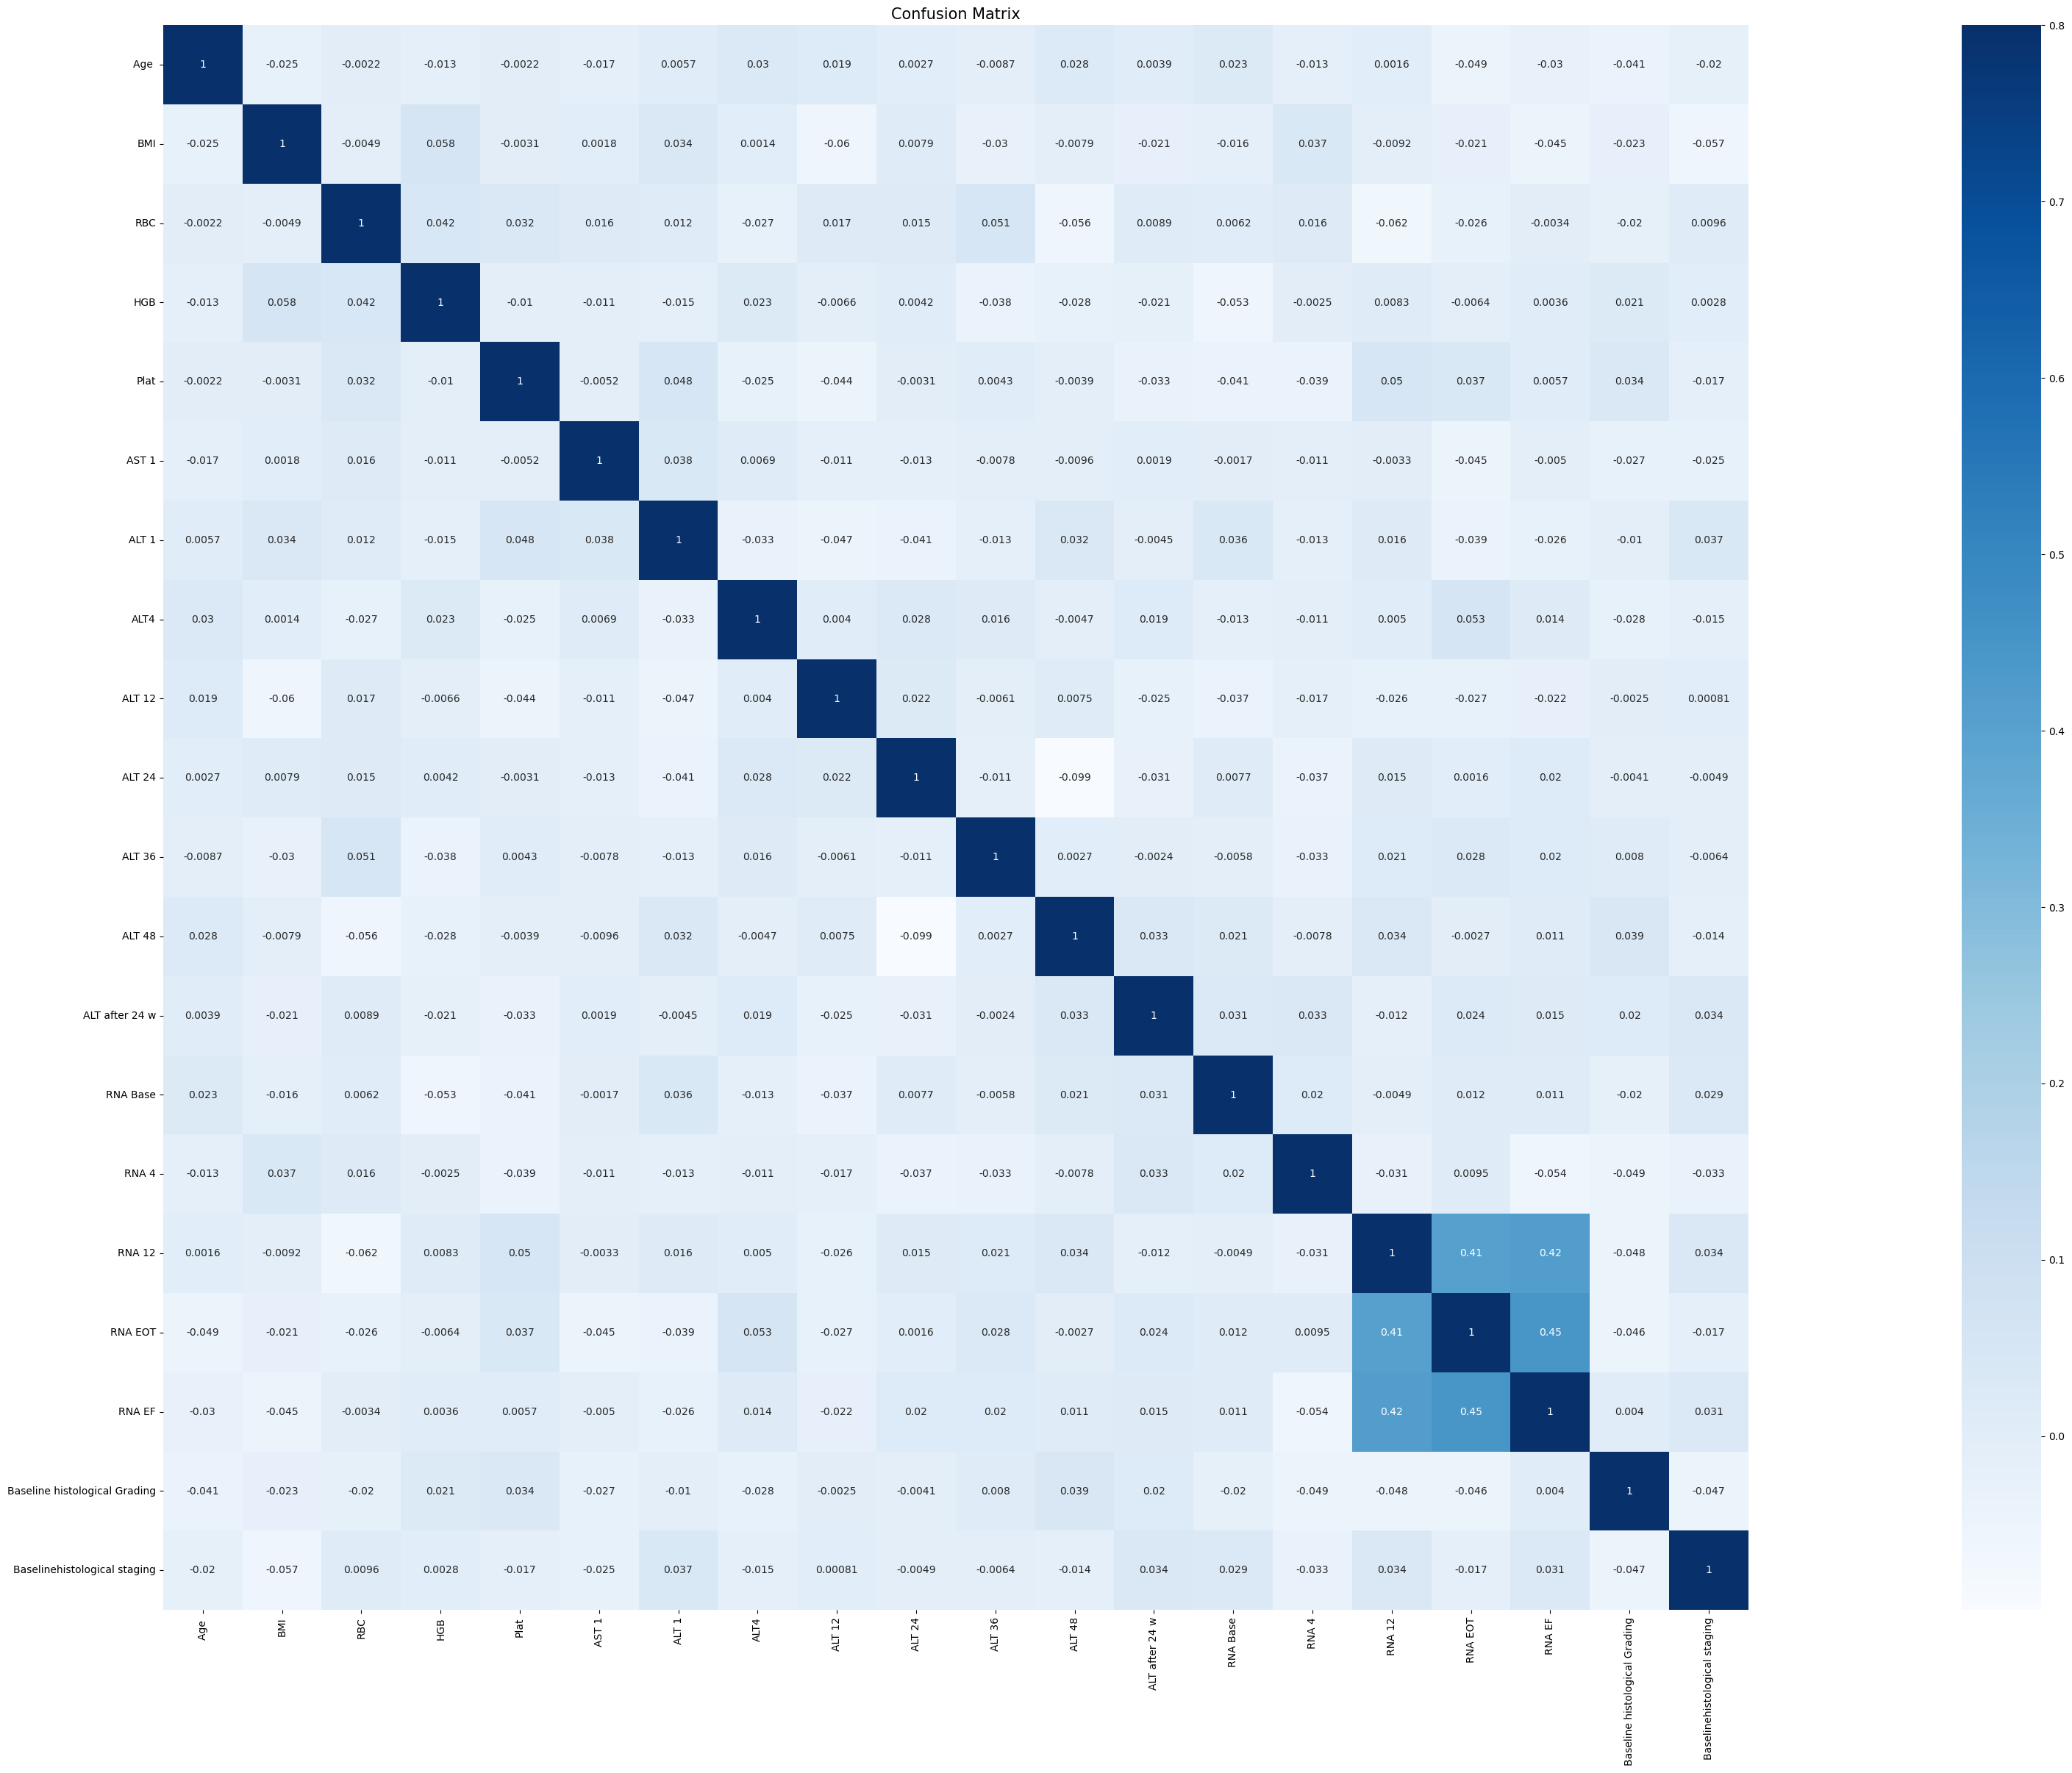

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(75,28)
data_cor = dfAfterSelection.corr()
sns.heatmap(data_cor, vmax =.8, square = True, annot = True,cmap='Blues' )
plt.title('Confusion Matrix',fontsize=15);

> - Quelles sont les variables les plus corrélées positivement ? négativement ? Quelles sont les variables les moins corrélées ?


In [28]:
# 
pCor = list()
nCor = list()
mCor = list()
for i in data_cor.index.values:
    for j in data_cor.columns.values:
        if i != j:
            if data_cor.loc[i,j] > 0.25 :
                pCor.append(set(i,j)))
            elif data_cor.loc[i,j] < -0.25:
                nCor.append(set(i,j))
            else:
                mCor.append(set(i,j))

pCor = list(set(pCor))
nCor = list(set(nCor))
mCor = list(set(mCor))
print(f"""
Variables correlées positives: {pCor}
{'-'*20}
Variables correlées negatives: {nCor}
{'-'*20}
Variables correlées moins corrélées: {mCor}
{'-'*20}
""")

TypeError: set expected at most 1 argument, got 2

# II- Extraction de motifs graduels fréquents / fermés / maximaux

In [24]:
import so4gp as sgp

> 1. Exécuter l’algorithme graank d’extraction d’itemsets graduels fréquents par corrélation de rang en faisant varier le seuil de support minimum et visualiser les résultats (nombres d’itemsets graduels fréquents). Vous pouvez utiliser la fonction graank du module so4gp.


In [25]:
# graduels fréquents avec GRAANK
print("Motifs graduels fréquents avec GRAANK")
mine_obj = sgp.GRAANK(data_cor, min_sup=0.5, eq=False)
gp_json = mine_obj.discover()
print(gp_json)

Motifs graduels fréquents avec GRAANK



KeyboardInterrupt



> 2. Comparer les corrélations entre variables fournies par les motifs graduels de la question précédente à celles obtenues par le calcul de corrélation à la section précédente.

> 3. Exécuter l’algorithmes acogps inclus dans le package téléchargé pour une extraction approximative d’itemsets et comparer le résultat aux résultats de la question 1,.

> 4. A partir des itemsets graduels obtenus à la question 1, lister les itemsets graduels fermés/maximaux

> 5. Extraire directement les itemsets graduels fermés/maximaux à partir des algorithmes dédiés comme Parami-
ner/GLCM/ (https ://www.lamsade.dauphine.fr/ bnegrevergne/webpage/software/paraminer/).


In [ ]:
# graduels Approximatifs avec GRAANK par  colonies de fourmis
print("Motifs graduels Approximatifs avec GRAANK")
mine_obj_ant = sgp.AntGRAANK(data_cor)
gp_json = mine_obj_ant.discover()
print(gp_json)